<a href="https://colab.research.google.com/github/Pauline-Zeestraten/skills-introduction-to-github/blob/main/Copy_of_Project_Python_Foundations__FoodHub_Data_Analysis_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSBA program/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows, and 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:  The columns 'order_id', 'customer_id' and 'food_preparation_time' and 'delivery_time' all have integers as datatype. The column 'cost_of_the_order' has float or decimal datatype, while the remaining columns 'restaurant_name', 'cuisine_type', 'day_of_the_week' and 'rating' have all object as datatype, which means they are strings.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code to detect missing values:
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:There are no missing values in the data, based on the "Non-Null Count" for each column returning 1898, meaning, not a single row was missing data for each of the columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code to check statistical summary of the data:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: The average cost of take out order is $16.50, the average time for food preparation is 27 minutes, with an average delivery time of 24 minutes.  


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code that checks how many orders are not rated:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
# Calculate the number of orders that were not rated
not_rated_count = df['rating'][df['rating'] == 'Not given'].count()
not_rated_count


np.int64(736)

In [ ]:
# Calculate the total number of orders
total_orders = df['order_id'].count()
total_orders



np.int64(1898)

In [ ]:
# Calculate the percentage of orders not rated
percentage_not_rated = (not_rated_count / total_orders) * 100

print(f"The percentage of orders that were not rated is: {percentage_not_rated:.2f}%")

The percentage of orders that were not rated is: 38.78%


#### Observations:  736 out of 1898 orders were not rated. That is 38.78%, a significant percentage.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

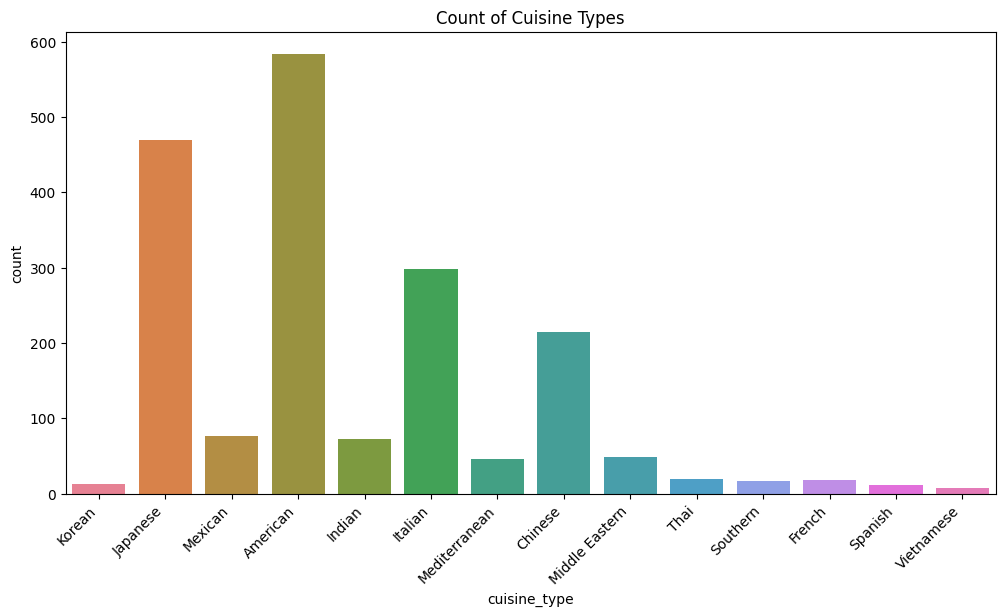

In [ ]:
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type', legend=False) # Use a color palette and assign x to hue
plt.title('Count of Cuisine Types')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

Observation: Most popular cuisine type for FoodHub take out order is American, followed by Japanese cuisine.

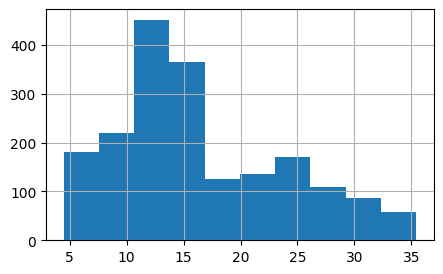

In [ ]:
# Create histogram for cost of the order.
df['cost_of_the_order'].hist(figsize=(5,3))
plt.show()

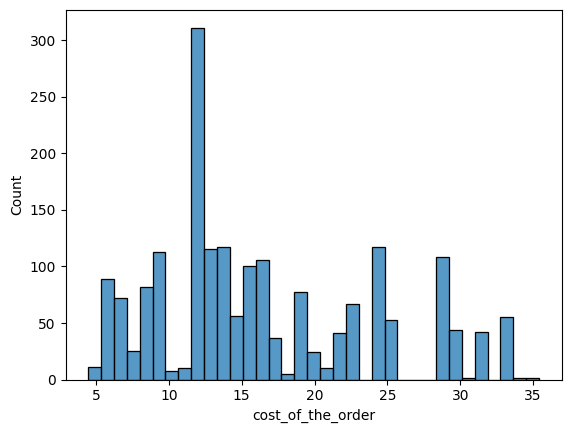

In [ ]:
# Create histogram for cost of order:
sns.histplot(data=df, x='cost_of_the_order', bins=35)
plt.show()

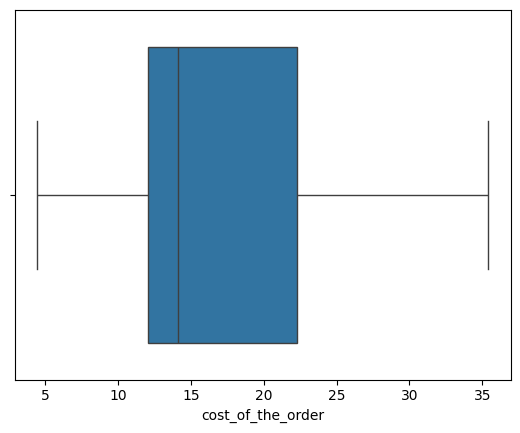

In [ ]:
# Create a boxplot for cost of order
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

Observation: The histograms show a right skewed distribution. The boxplot shows 50% of the orders costs $14.14 or less.

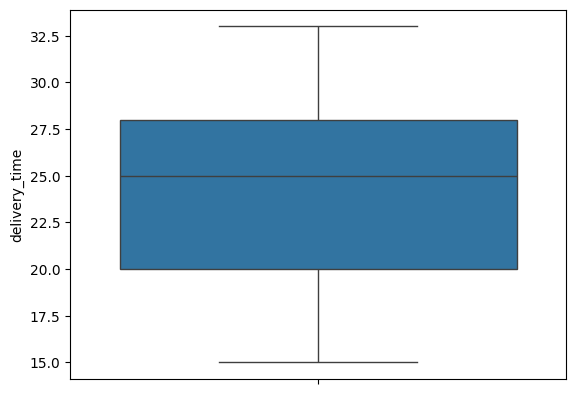

In [ ]:
# Create a boxplot for delivery time.
sns.boxplot(df['delivery_time'])
plt.show()

Observation:  The boxplot shows a median delivery time of 25 minutes, with 50% of deliveries ranging between 20 and 28 minutes.

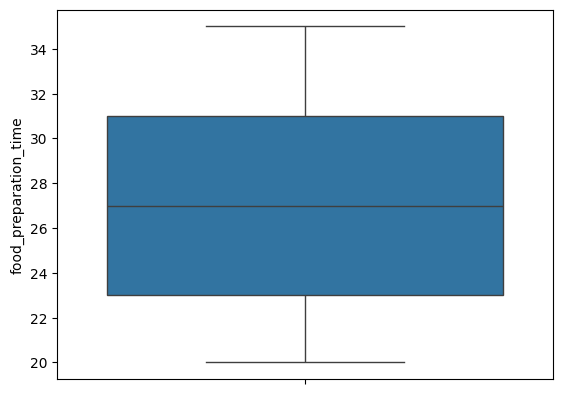

In [ ]:
sns.boxplot(df['food_preparation_time'])
plt.show()

Observation:  The boxplot shows median preparation time is 27 minutes, with 25 percentile of orders prepared at 23 minutes and 75 percentile at 31 mintues.

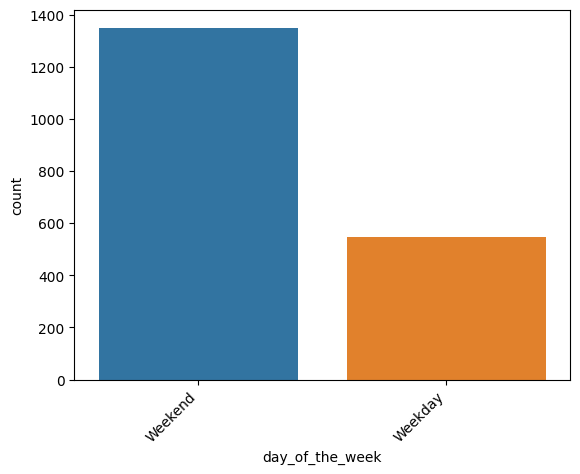

In [ ]:
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.xticks(rotation=45, ha= 'right')
plt.show()

Observation:  Weekend orders are more than double than all weekday orders.  Opportunity for growth in weekday orders.

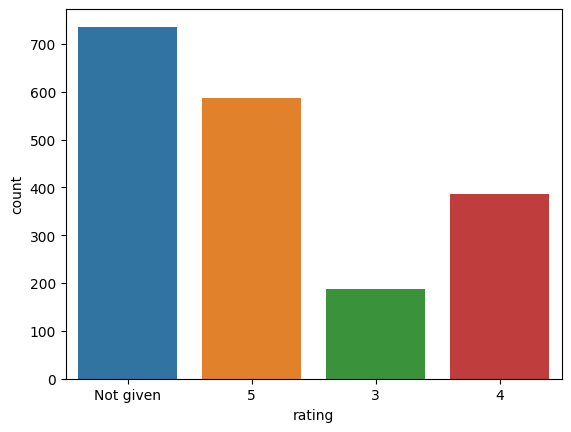

In [ ]:
sns.countplot(data=df, x='rating', hue='rating')
plt.show()

Observation:  The majority of customers do not give a rating.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code to determine the top 5 restaurants:
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: The number one restaurant is Shake Shack, and three out of the top five restaurants serve American cuisine style food.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code to determine the most popular cuisine on weekends:
df['cuisine_type'][df['day_of_the_week']=='Weekend'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations: American cuisine is most popular on weekends. Weekends are the most popular days of the week to order take out.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Create the code that determines orders costing more than $20
df['cost_of_the_order']>20
df['cost_of_the_order'][df['cost_of_the_order']>20]



,cost_of_the_order
0,30.75
3,29.20
5,25.22
12,24.30
17,33.03
...,...
1884,31.43
1885,29.05
1892,29.15
1893,22.31


In [ ]:
# Create code that determines percentage of orders that costs more than $20
percentage_greater_than_20=df['cost_of_the_order'][df['cost_of_the_order']>20].count()/df['cost_of_the_order'].count()*100
percentage_greater_than_20

np.float64(29.24130663856691)

In [ ]:
percentage_greater_than_20 = df['cost_of_the_order'][df['cost_of_the_order']>20].count()/df['cost_of_the_order'].count()*100

print(f"The percentage of orders costing more than $20 is {percentage_greater_than_20:.2f}%")

The percentage of orders costing more than $20 is 29.24%


Observation:  Almost 30 percent of total orders cost $20 or more.  This is significantly higher than the median and average cost of orders at 14 and 16 dollars respectively.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)
top_3_customers = df['customer_id'].value_counts().head(3)
print("The IDs of the top 3 most frequent customers are:"),
print(top_3_customers)


The IDs of the top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 customers are responsible 32 orders out of 1898 orders, a little less than 2% of total orders.  There is an opportunity to explore more growth for multiple orders per customer.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


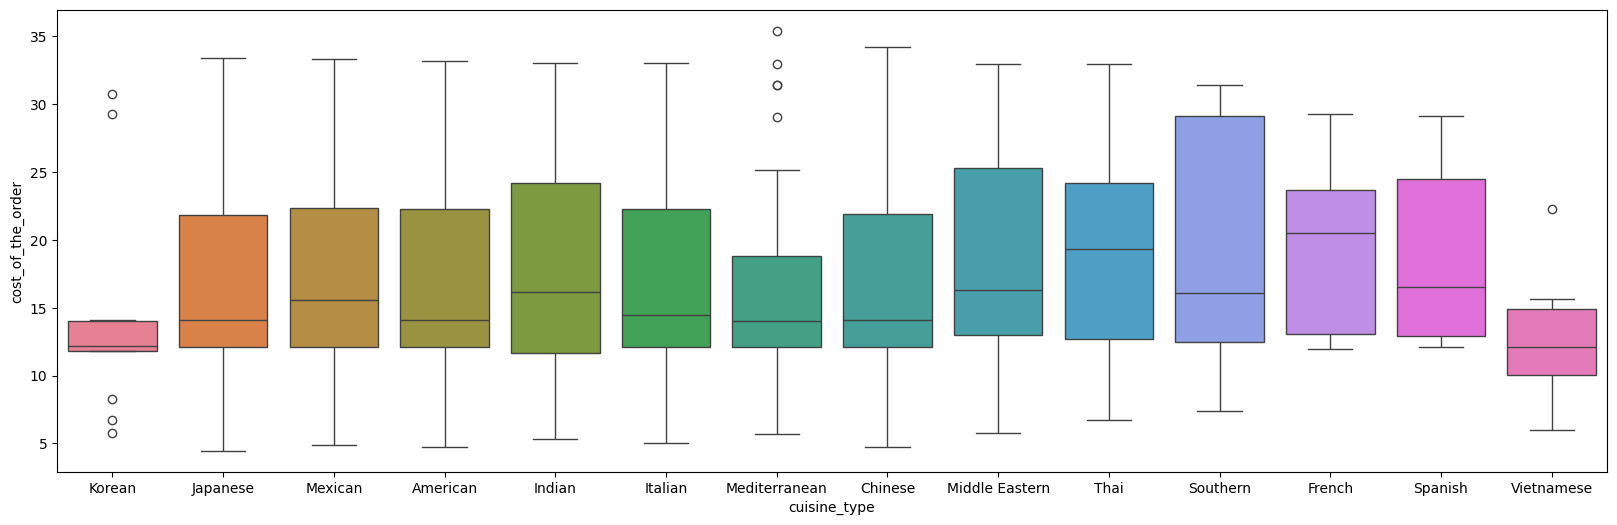

In [ ]:
# Create a scatter plot, pair plot, heatmap, grouped bar chart, box plot with hue, violin plot, line plot with hue:
# Create a scatter plot to explore relation between cuisine type and cost of order.
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', legend=False)
plt.show()

Observation:


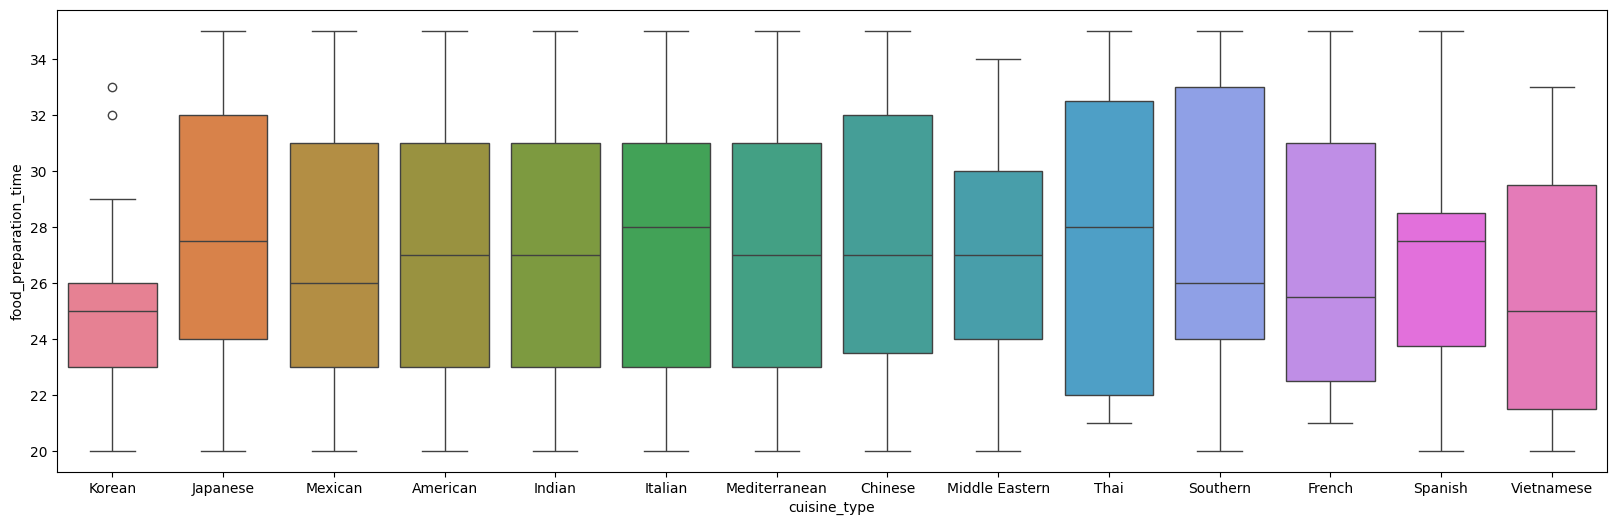

In [ ]:
# Create a boxplot between food preparation and cuisine type
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.show()

Observation:


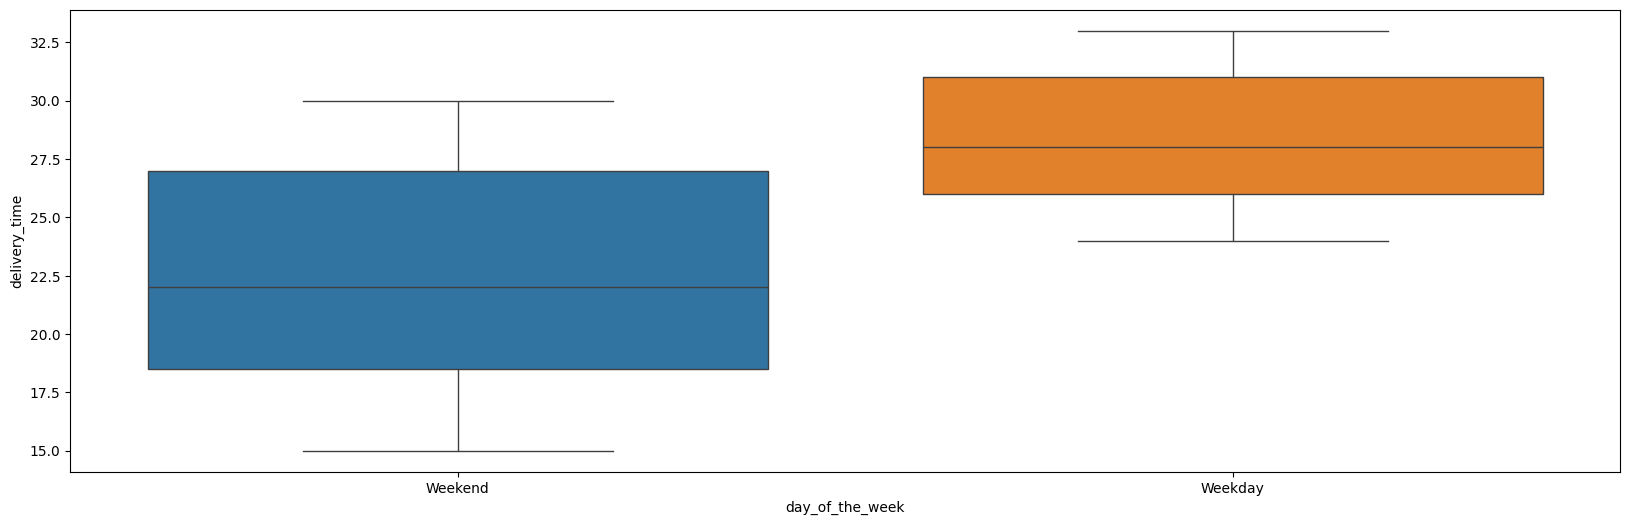

In [ ]:
# Create a boxplot exploring the relationship between day of the week and delivery time
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.show()

Observation:  Delivery time of orders significantly slower during weekdays than it is on weekends.  

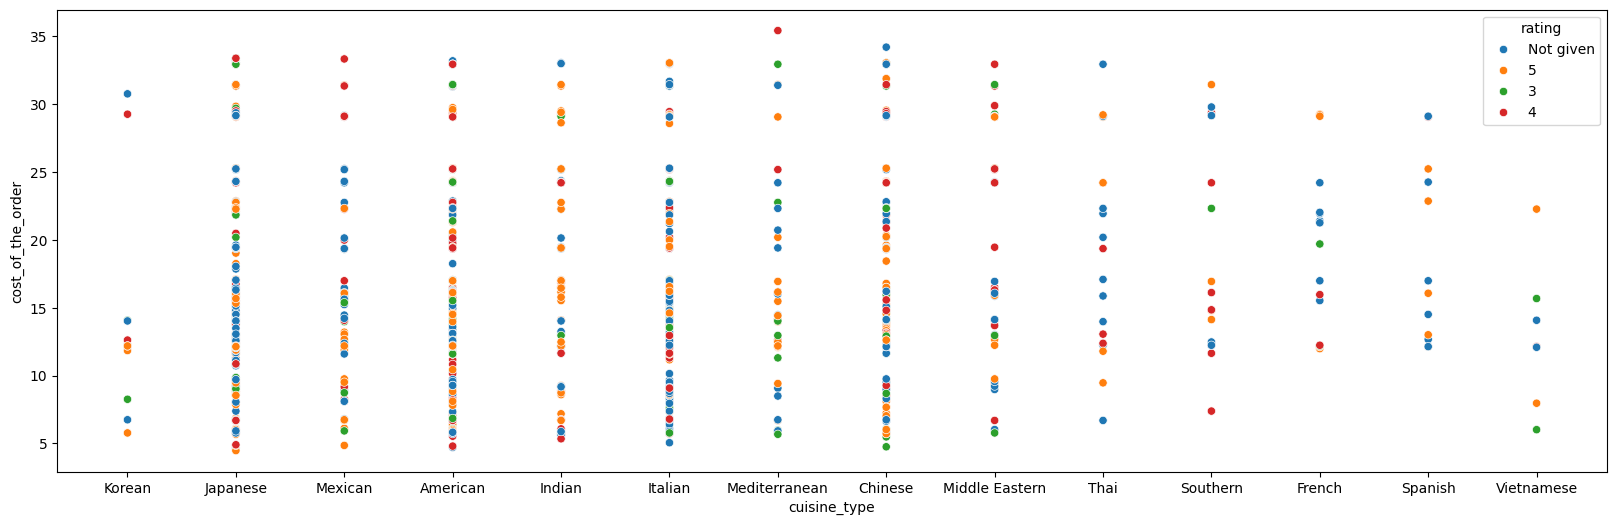

In [ ]:
# Create a scatterplot exploring the relation between rating, cuisine_type, and cost of the order.
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='rating', legend=True)
plt.show()

Observation:  We see heavily dotted, popular cuisines such as Chinese, American and Japanese style orders.  We see a gap in mid range cost for Korean take out, no orders in the $15 to $28 range.  Of all the cuisines available, only the French and Spanish cuisines have orders starting above $12.50.

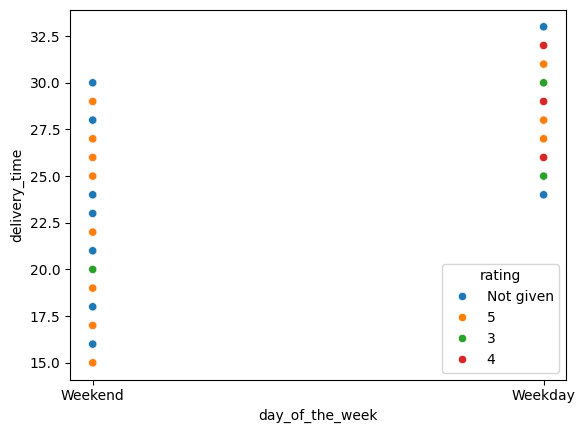

In [ ]:
# Create a scatterplot exploring the relation between rating, cuisine_type, and delivery time.
sns.scatterplot(data=df, x='day_of_the_week', y='delivery_time', hue='rating', legend=True)
plt.show()

Observation:  Despite the delivery time during weekdays significantly taking longer, it is not having a huge impact on ratings, compared to the ratings given to orders placed during the weekend.  

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code that distinguishes the restaurants that have a rating count >50 and a rating average >4
# First, make sure the column 'rating' displays no strings, convert all values to numeric datatype.
df['rating'] = df['rating'].replace('Not given', np.nan)

In [ ]:
df['rating'].head()

,rating
0,NaN
1,NaN
2,5.0
3,3.0
4,4.0


In [ ]:
df['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [ ]:
# Write the code that lists all the ratings in rating column:
df['rating'].head()


,rating
0,NaN
1,NaN
2,5.0
3,3.0
4,4.0


In [ ]:
# Write the code that shows all the values in the rating column
df['rating'].value_counts()

,count
rating,
5.0,588
4.0,386
3.0,188


In [ ]:
# Write the code that shows all restaurants with 50 or more ratings, and with an average rating higher than 4:

# Create new df grouped by restaurant name and calculate the count and mean of ratings
df_restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter for restaurants with a rating count > 50 and mean rating > 4
promotional_restaurants = df_restaurant_ratings[(df_restaurant_ratings['count'] > 50)&(df_restaurant_ratings['mean'] > 4)]

#print("Restaurants with more than 50 ratings and an average rating higher than 4:")
display(promotional_restaurants)

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:  The restaurants with the most orders are also the restaurants with more than 50 ratings that average a rating higher than 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Create a new column df['Revenue'] that defines a function that calculates the revenue for each order:
def calculate_revenue(order_cost):
  if order_cost > 20:
    return order_cost * 0.25
  elif order_cost > 5:
    return order_cost * 0.15
  else:
    return 0

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
df['revenue'].head()
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [ ]:
# Net revenue generated by Food Hub across all orders:
total_revenue = df['revenue'].sum()
print(f"The net revenue generated across all orders is {total_revenue:.2f} dollars")

The net revenue generated across all orders is 6166.30 dollars


#### Observations: Suggestion to focus on marketing of larger than $20 dollar orders to increase net revenue


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code to determine total time: df['food_preparation_time']+ df['delivery_time'];
df['total_time'] = df['food_preparation_time']+ df['delivery_time']
df['total_time'].head()

,total_time
0,45
1,48
2,51
3,40
4,49


In [ ]:
# Determine percentage of df['total_time'] is >60 minutes
percentage_longer_than_60_min = df['total_time'][df['total_time']>60].count()/df['total_time'].count()*100
print(f"The percentage of orders taking longer than 60 minutes is {percentage_longer_than_60_min:.2f}%")

The percentage of orders taking longer than 60 minutes is 10.54%


#### Observations: The percentage of orders taking longer than 60 minutes is relatively small at 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Determine average delivery time during weekdays and weekends
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: Delivery time on weekdays is on average about six minutes longer than during the weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Almost 40% of all orders are not given a rating (732 out of 1898 orders), which leaves FoodHub's rating mechanism underutilized, and prevents optimal insight into which cuisine types and restaurants are relatively undiscovered and may benefit from extra exposure through marketing.

* The data shows that deliveries during the weekend are more popular, and that delivery times are shorter during the weekend.  On the other hand, the ratings of deliveries are similar during weekend and week day deliveries.  It may be interesting to find out if the ratings reflect only the quality of the food or also the delivery time of the order.  If so, why are ratings during weekdays equal to weekend?

### Recommendations:

*  

---